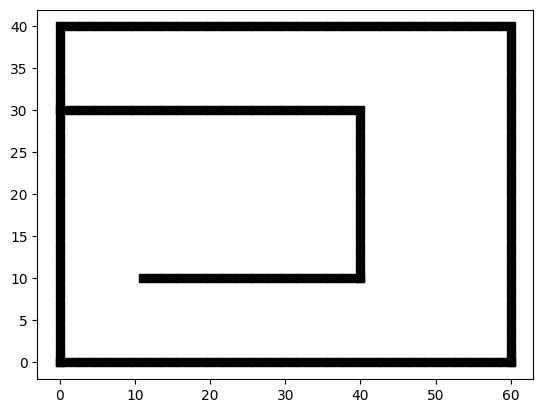

In [1]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots()

# set obstacle positions
ox, oy = [], []
for i in range(61):
    ox.append(i)
    oy.append(0)
    
    ox.append(i)
    oy.append(40)
    
for i in range(40):
    ox.append(0)
    oy.append(i)
    
    ox.append(60)
    oy.append(i)
    
for i in range(30):
    ox.append(40-i)
    oy.append(10)

for i in range(20):
    ox.append(40)
    oy.append(10+i)
    
for i in range(41):
    ox.append(i)
    oy.append(30)
plt.plot(ox, oy, "sk")


In [2]:
# points: (10, 35), (50,35), (50, 5), (5, 5),(5,20),(30,20)
points = np.array([[10, 35], [50,35], [50, 5], [5, 5], [5,20], [30,20]])
n = points.shape[0]
t = np.arange(n)
cs = CubicSpline(t, points)

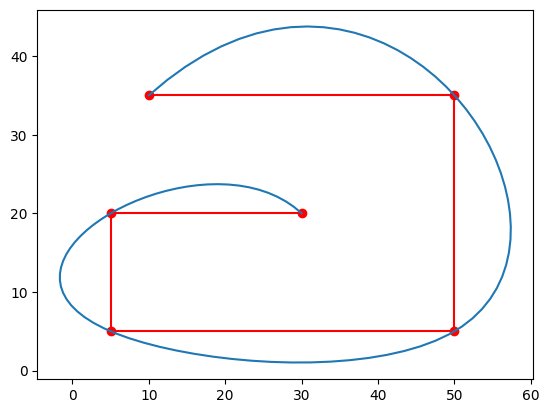

In [3]:
xs = np.linspace(0, n-1, 100)
# plt.plot(ox, oy, "sk")
plt.plot(points[:,0], points[:,1], "ro-")
plt.plot(cs(xs)[:,0], cs(xs)[:,1])

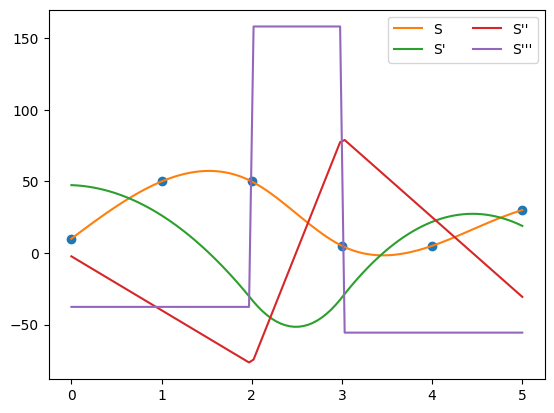

In [4]:
plt.plot(t, points[:,0], 'o')
plt.plot(xs, cs(xs)[:,0], label="S")
plt.plot(xs, cs(xs, 1)[:,0], label="S'")
plt.plot(xs, cs(xs, 2)[:,0], label="S''")
plt.plot(xs, cs(xs, 3)[:,0], label="S'''")
plt.legend(loc='upper right', ncol=2)
plt.show()

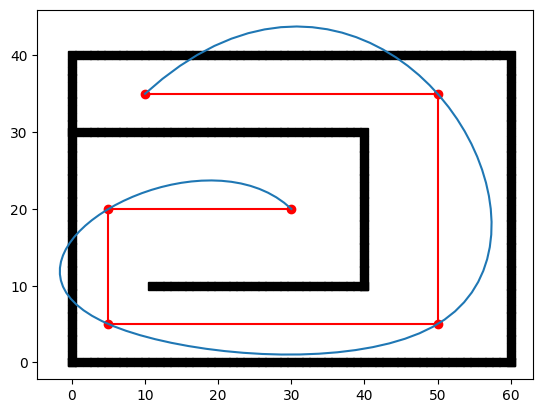

In [5]:
xs = np.linspace(0, n-1, 100)
plt.plot(ox, oy, "sk")
plt.plot(points[:,0], points[:,1], "ro-")
plt.plot(cs(xs)[:,0], cs(xs)[:,1])

[  0.  40.  70. 115. 130. 155.]


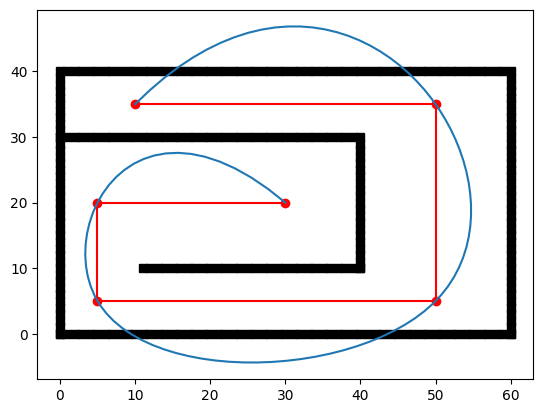

In [6]:
v = 1
t2 = np.array([0])
for i in range(n-1):
    t2=np.append(t2, t2[i]+ np.hypot(points[i,0]-points[i+1,0], points[i,1]-points[i+1,1])/v)
print(t2)


cs2 = CubicSpline(t2, points)
xs = np.linspace(0, t2[-1], 100)

plt.plot(ox, oy, "sk")
plt.plot(points[:,0], points[:,1], "ro-")
plt.plot(cs2(xs)[:,0], cs2(xs)[:,1])

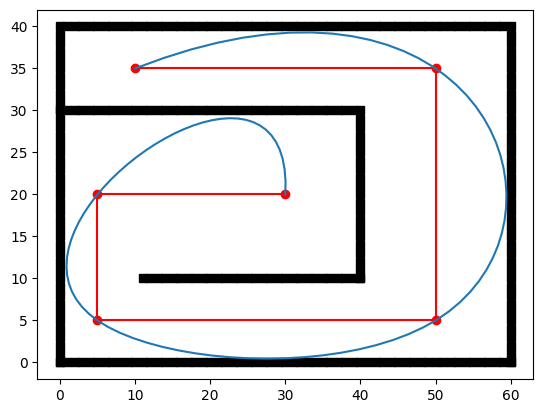

In [7]:
t3 = np.array([0, 1.7, 4.3, 6.8, 8.6, 11.8])
cs2 = CubicSpline(t3, points)
xs = np.linspace(0, t3[-1], 100)

plt.plot(ox, oy, "sk")
plt.plot(points[:,0], points[:,1], "ro-")
plt.plot(cs2(xs)[:,0], cs2(xs)[:,1])

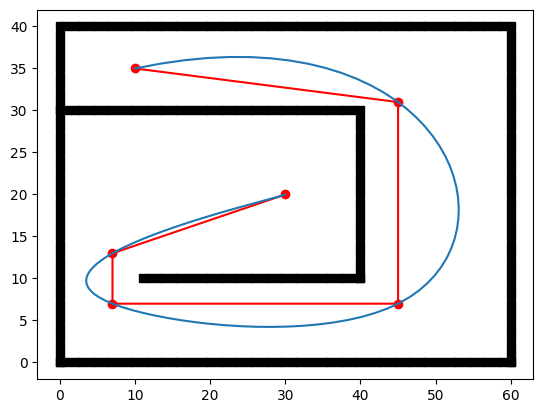

In [8]:
points2 = np.array([[10, 35], [45,31], [45, 7], [7, 7], [7,13], [30,20]])

cs3 = CubicSpline(t3, points2)

xs = np.linspace(0, t3[-1], 100)

plt.plot(ox, oy, "sk")
plt.plot(points2[:,0], points2[:,1], "ro-")
plt.plot(cs3(xs)[:,0], cs3(xs)[:,1])

(-3.0, 63.0, -2.0, 42.0)

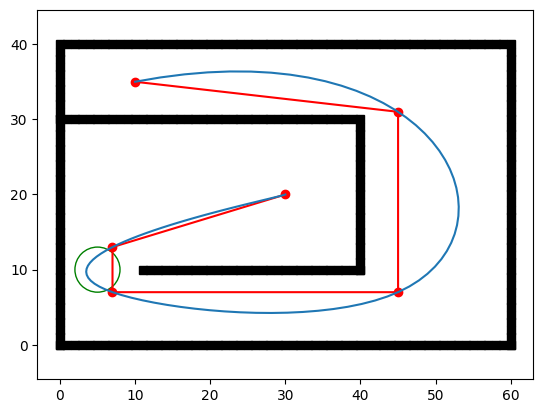

In [9]:
fig, ax = plt.subplots()
plt.plot(ox, oy, "sk")
plt.plot(points2[:,0], points2[:,1], "ro-")
plt.plot(cs3(xs)[:,0], cs3(xs)[:,1])
# draw a circle at (5,10) with radius 5
circle = plt.Circle((5,10), 3, color='g', fill=False)
# display the circle
ax.add_patch(circle)
ax.axis('equal')

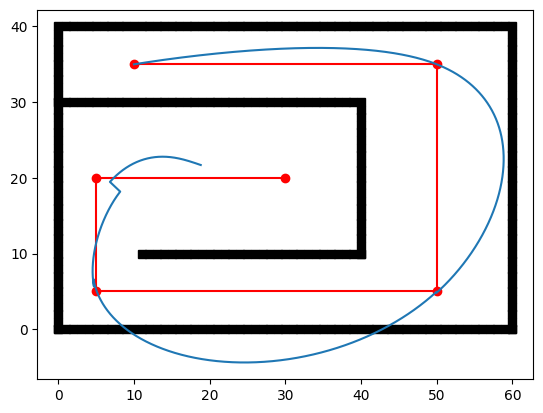

In [11]:
from pysrc.Mini_Snap_traj import minimum_snap_traj, get_traj
points3 = np.array([[10, 35, 0],
                    [50,35, 0],
                    [50, 5, 0], 
                    [5, 5, 0],
                    [5, 20, 0],
                    [30,20, 0]])

fig, ax = plt.subplots()
plt.plot(ox, oy, "sk")
plt.plot(points3[:,0], points3[:,1], "ro-")
time_set, Matrix_x, Matrix_y, Matrix_z = minimum_snap_traj(points3, 50, 7, 4)
p, v, a, sample_list = get_traj(Matrix_x, Matrix_y, Matrix_z, time_set, 100)
plt.plot(p[0],p[1])
ax.axis('equal')
plt.show()